<h1>Business Understanding</h1>
<h2>The CIFAR-10 Dataset</h2>
<h3>Overview</h3>
<p>
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 
</p>

<p>
    <ul>
        <li>Airplane</li>
        <li>Automobile</li>
        <li>Bird</li>
        <li>Cat</li>
        <li>Deer</li>
        <li>Dog</li>
        <li>Frog</li>
        <li>Horse</li>
        <li>Ship</li>
        <li>Truck</li>
    </ul>
</p>

<p>The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.</p>

<h3>Purpose of the Dataset</h3>
<p>To train machine learning and computer vision algorithms, as these algorithms learn to recognize objects in images by example.</p>
<h3>Why was the data collected in the first place?</h3>
<p>The data was collected by the Canadian Institute for Advanced Research (CIFAR). It is a labeled subset of the 80 million tiny images dataset. Students were paid to label those images. This dataset was built primarily for machine learning reasearch.</p>
<h3>Prediction Task</h3>
<p>The task is to be able to accurately classify the images by labels. There are 10 classes and labels in this dataset. As this dataset was primarily built for machine learning research, educational institutions and researchers would be most interested in this dataset to train and test their algorithms. The importance of this dataset lies in its versatility and simplicity; it is a clean dataset with a clear prediction task that can be used to train algorithms.</p>

<h3>Business Case: Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to the identified third parties</h3>
<p>A cloud image service like imgur could utilize an image classifer to classify every image that gets uploaded to their servers. Image classification could be important to exclude certain images from getting uploaded, as manually surfing through all uploaded images is inefficient and impractical. So it would function as a filter. It could also serve to classify the content of those images and assign a label for each. While this is a relatively small subset of images with a small number of classes (10), it would serve to test the performance of different prediction algorithms. Having said that, the prediction algorithm would need to be very accurate to be useful for those uses. A margin of 97% accuracy is selected in this case. Identifying a car as a frog is unacceptable, as an example.</p>

<h2>Reading in The Images</h2>

In [1]:
# Loading (unpickling) the data for later processing
import numpy as np
import pickle
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dicts = pickle.load(fo, encoding='bytes')
        images = dicts[b'data']
        labels = dicts[b'labels']
        imageArray = np.array(images)
        labelArray = np.array(labels)
    return imageArray, labelArray

In [332]:
# These are the data and class variables (targets)
first_batch_images, first_batch_labels = unpickle('cifar-10-batches-py\data_batch_1')
second_batch_images, second_batch_labels = unpickle('cifar-10-batches-py\data_batch_2')
third_batch_images, third_batch_labels = unpickle('cifar-10-batches-py\data_batch_3')
fourth_batch_images, fourth_batch_labels = unpickle('cifar-10-batches-py\data_batch_4')
fifth_batch_images, fifth_batch_labels = unpickle('cifar-10-batches-py\data_batch_5')

images = np.vstack((first_batch_images, second_batch_images, third_batch_images, fourth_batch_images, fifth_batch_images))
image_labels = np.vstack((first_batch_labels, second_batch_labels, third_batch_labels, fourth_batch_labels, fifth_batch_labels))
images_array = np.hstack((images, image_labels.reshape((50000, 1))))

# Here we randomly shuffle the rows of the image batch arrays
np.random.shuffle(images_array)

# Then we slice the array back into the features and target arrays
images, image_labels = images_array[:, :-1], images_array[:, -1]

<h2>Processing the images: Recoloring and Linearization</h2>

<p>
First, we initialize numpy arrays to process the five batches.
The images are 32x32 each, and each row in the original arrays represents the image.
First comes the 32x32 = 1024 red channel followed by 1024 entries of green and then 1024 entries of blue, making the length of each row 3072.
I convert them to grayscale and map them into a new numpy array for later processing.
</p>

In [333]:
image_count = images.shape[0]
proc_images = np.zeros((image_count, 1024))

for image_idx in range(image_count):
    for i in range(1024):
        proc_images[image_idx, i] = 0.3*images[image_idx, i] +  0.59*images[image_idx, i + 1024] + 0.11*images[image_idx, i + 2048]

In [334]:
n_samples, n_features = proc_images.shape

# As given by the dataset
h, w = 32, 32

labels = np.array(['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])
n_classes = len(labels)

In [335]:
print('My dataset contains', proc_images.shape[0],'images')

My dataset contains 50000 images


<h3>Class balance in the dataset</h3>
<p>The code below shows the number of instances of each of the classes in the dataset. They all have a count of 5000. The dataset is perfectly balanced.</p>

In [336]:
for i in range(n_classes):
    print('The number of instances from the ', i, 'class is: ', len(image_labels[image_labels == i]))

The number of instances from the  0 class is:  5000
The number of instances from the  1 class is:  5000
The number of instances from the  2 class is:  5000
The number of instances from the  3 class is:  5000
The number of instances from the  4 class is:  5000
The number of instances from the  5 class is:  5000
The number of instances from the  6 class is:  5000
The number of instances from the  7 class is:  5000
The number of instances from the  8 class is:  5000
The number of instances from the  9 class is:  5000


In [337]:
# A function to show a sample of the image data
def plot_gallery(images, titles, h, w, n_row=3, n_col=11):
    plt.figure(figsize = (1.6 * n_col, 1.6 * n_row))
    
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

<h3>Image Data</h3>

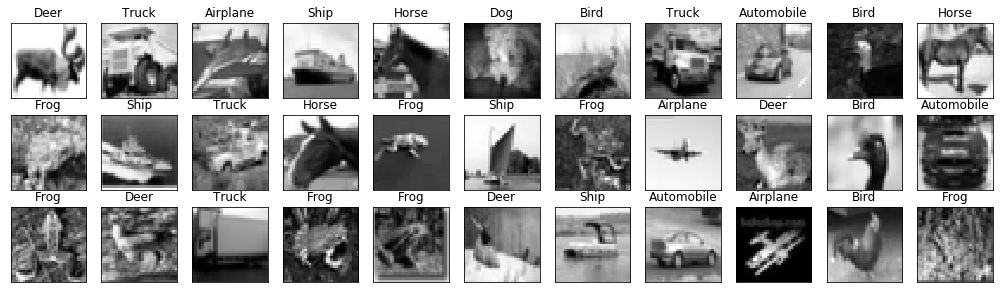

In [338]:
plot_gallery(proc_images, labels[image_labels], h, w)

<h3>Final Dataset</h3>
<p>The images have been read in, recolored and linearized into row vectors. All 50,000 images in the 5 training batches have been processed to form my dataset. The mix of all five batches (the 50,000 images) have a balanced number of pictures corresponding to each the classes. I will only be working with 2500 images in this assignment and I assume that the random 2500 images I procure from the overall set are perfectly balanced, which is not true per se, but they will be almost nearly balanced.</p>

In [339]:
# This is the function I am using to get my final image set of 2500 images
def get_2500_images(images, image_labels):
    
    shuffled_images = np.hstack((images, image_labels.reshape((image_labels.shape[0], 1))))
    np.random.shuffle(shuffled_images)
    s_images, s_image_labels = shuffled_images[:, :-1], shuffled_images[:, -1]
    return s_images[0:2500], s_image_labels[0:2500].astype(int)

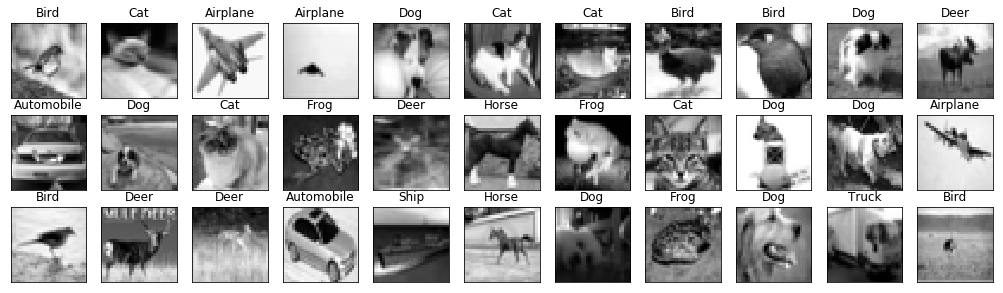

In [340]:
sample_images, sample_image_labels = get_2500_images(proc_images, image_labels)
plot_gallery(sample_images, labels[sample_image_labels], h, w)

In [341]:
for i in range(n_classes):
    print('The number of instances from the ', i, 'class is: ', len(sample_image_labels[sample_image_labels == i]))

The number of instances from the  0 class is:  266
The number of instances from the  1 class is:  265
The number of instances from the  2 class is:  232
The number of instances from the  3 class is:  243
The number of instances from the  4 class is:  249
The number of instances from the  5 class is:  237
The number of instances from the  6 class is:  251
The number of instances from the  7 class is:  263
The number of instances from the  8 class is:  248
The number of instances from the  9 class is:  246


<p>As can be seen above, the classes are near perfectly balanced.</p>

<h1>Evaluation</h1>

<h2>Evaluation Metric</h2>
<p>As per my business case, which is image classification, accuracy is the evaluation metric I choose. I choose accuracy because:
<ul>
    <li>The image dataset is perfectly balanced; there's no class imbalance present in the dataset, so a simple evaluation metric such as accuracy would work perfectly well.</li>
    <li>There is no special importance assigned to the classification of any of the classes compared to the others. The cost of misclassification for all the classes is the same.</li>
    <li>The model that is yet to be modeled is meant as a prototype for a deployable classification model, and accucracy is a good quantification of generalization performance for balanced data, so accuracy is the evaluation metric for this dataset.</li>
</ul>

<h2>Data Division</h2>
<p>
    <ul>
        <li>The dataset will be split according to 80/20 for training/testing.</li>
        <li>Stratified K-Folding will be used on the 80% training dataset for cross validation. Stratified K-Folds are approproate because I want to make sure that each fold is a perfect representative of the overall training dataset.</li>
        <li>Finally, the model with the best statistical quantities resulting from the Grid Search will be tested using the untouched 20% of the images. Its performance in classifying those 20% of images dictate its generalization performance.</li>
    </ul>
</p>

<h1>Modeling</h1>
<h2>Model with Customized Number of Hidden Layers</h2>

<p>Below is the model of a multi-layer perceptron with a customizable number of hidden layers (of fixed size of neurons). It is based on the notion of collecting all matrices relevant to the calculations (As, Zs, Ws) in lists, and refering to those matrices by the list index, So the A list contain all the A matrices, the Z list contain all the Z matrices, and the V list contain all sensitivity matrices, and the W list contain all weight matrices.</p>

In [618]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class TwoLayerPerceptronBase(object):
    def __init__(self, n_layers=2, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_layers = n_layers
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""

        # Here I define the input layer
        W_input_num_elems = (self.n_features_ + 1)*self.n_hidden
        W_input = np.random.uniform(-1.0, 1.0,size=W_input_num_elems)
        W_input = W_input.reshape(self.n_hidden, self.n_features_ + 1)
        
        W = []
        
        W.append(W_input)
        # Here I define and initialize the hidden layers
        for layer in range(self.n_layers):
            W.append(np.zeros((self.n_hidden, self.n_hidden + 1)))

        # Definition of the output layer
        W_out_num_elems = (self.n_hidden + 1)*self.n_output_
        W_out = np.random.uniform(-1.0, 1.0, size=W_out_num_elems)
        W_out = W_out.reshape(self.n_output_, self.n_hidden + 1)
        
        W.append(W_out)
        
        # All the layers are appended to the W list, first the input layer, then the hidden layers followed by the output layer
        return W
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms for all the weight matrices in list W
        m = 0
        for i in range(len(W)):
            m += np.mean(W[i][:, 1:] ** 2)
        return (lambda_/2.0) * np.sqrt(m)
    
    def _cost(self,y_pred,Y_enc, W):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-y_pred)**2)
        L2_term = self._L2_reg(self.l2_C, W)
        return cost + L2_term
    
    def _feedforward(self, X, W):
        """Compute feedforward step
        """
        # Here I construct A and Z lists for the model. It contains all As and all Zs
        A_input = self._add_bias_unit(X.T, how='row')
        Z_input = W[0] @ A_input
                
        A = []
        Z = []
        
        A.append(A_input)
        Z.append(Z_input)
        
        for layer in range(1,len(W)):
            A_hid_layer = self._sigmoid(Z[layer - 1])
            A_hid_layer = self._add_bias_unit(A_hid_layer, how='row')
            Z_hid_layer = (W[layer]) @ A_hid_layer
            A.append(A_hid_layer)
            Z.append(Z_hid_layer)
        
        Z_out = Z[len(W)-1]
        A_out = self._sigmoid(Z_out)
        A.append(A_out)
        
        return A, Z, A_out
    
    def _get_gradient(self, A, Z, Y_enc, W):
        
        A_last = A[len(W)]
        # Here I construct a sensitivities list and a gradient list. Both contains all elements.
        V = []
        gradient = []
        
        for i in range(len(W)):
            V.append(0)
            gradient.append(0)
            
        for layer in range(len(W)-1,-1,-1):
            if (layer == len(W) - 1):
                V_out = -2*(Y_enc-A_last)*A_last*(1-A_last)
                V[layer] = (V_out)
                grad_last = V_out @ A[len(W)-1].T
                gradient[layer] = grad_last
            elif (layer == len(W) - 2):
                V_out_next = A[len(W)-1]*(1-A[len(W)-1])*(W[len(W)-1].T @ V_out)
                V[layer] = V_out_next
                grad_out_next =  V_out_next[1:,:] @ A[len(W)-2].T
                gradient[layer] = grad_out_next
            elif (layer < (len(W) - 2)):
                V[layer] = A[layer+1]*(1-A[layer+1])*(W[layer+1].T @ V[layer+1][1:,:])
                gradient[layer] = V[layer][1:,:] @ A[layer].T
                
        for i in range(len(W)-1):
            gradient[i][:, 1:] += W[i][:, 1:] * self.l2_C
        

        return gradient
    
    def predict(self, X):
        """Predict class labels"""
        A, Z, A_out = self._feedforward(X, self.W)
        y_pred = np.argmax(A_out.T, axis=1)
        return y_pred

In [619]:
class MultiLayerPerceptron(TwoLayerPerceptronBase):
    def fit(self, X, y):

        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)

        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W = self._initialize_weights()

        self.cost_ = []
        for i in range(self.epochs):
            # Calculating the A and Z lists
            A, Z, A_out = self._feedforward(X_data,self.W)
            # Calculating the cost
            cost = self._cost(A[len(self.W)],Y_enc,self.W)
            self.cost_.append(cost)
            
            # compute gradient via backpropagation
            gradient = self._get_gradient(A, Z, Y_enc,self.W)
            # Learning of the data
            for i in range(len(self.W)):
                self.W[i] -= self.eta * gradient[i]

        return self

<p>This model works, but I am not going to use it for my analysis, mainly because it is too slow. Instead of doing the grid search with respect to the number of hidden layers, I am going to do it with respect to the regualrization constant C. I hope you don't mind!</p>

<h2>The Model Used for The Assignment - A Three Layer Neural Network</h2>

<p>This is the model I am using for analysis. It implements a 3 layer perceptron. It implements the following functionalities:
    <ul>
        <li>Choosing between 'sigmoid' and 'linear' for the activation function.</li>
        <li>Choosing between the quadratic and the cross entropy functions for the objective function.</li>
        <li>An adaptive learning rate model based on the iteration index.</li>
        <li>It models momentum to help direct the next evaluation of the gradient.</li>
        <li>It also collects the magnitude of the gradients for each layer.</li>
    </ul>


</p>

In [654]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import sys
import pandas as pd

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class ThreeLayerPerceptronBase(object):
    def __init__(self, alpha, decreasing_const, phi, loss, n_hidden=30, C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.phi = phi
        self.loss = loss
        self.alpha = alpha
        self.decreasing_const = decreasing_const
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden + 1)*self.n_hidden
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden, self.n_hidden + 1 )
        
        W3_num_elems = (self.n_hidden + 1)*self.n_output_
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_output_, self.n_hidden + 1)
        
        return W1, W2, W3
    
    @staticmethod
    def _activation(z, phi):
        
        if (phi == 'sigmoid'):
            return expit(z)
        elif (phi == 'linear'):
            return z
        else:
            return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1,W2,W3):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2))
    
    def _cost(self,A4,Y_enc,W1,W2,W3, loss):
        '''Get the objective function value'''
        
        if (loss == 'quad'):
            cost = np.mean((Y_enc-A4)**2)
        elif (loss == 'cross'):
            cost = -np.mean(np.nan_to_num((Y_enc*np.log(A4)+(1-Y_enc)*np.log(1-A4))))
        L2_term = self._L2_reg(self.l2_C, W1,W2,W3)
        
        return cost + L2_term

In [708]:
class ThreeLayerPerceptron(ThreeLayerPerceptronBase):
    def _feedforward(self, X, W1, W2, W3, phi):

        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._activation(Z1, phi)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._activation(Z2, phi)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._activation(Z3, phi)
        
        return A1, Z1, A2, Z2, A3, Z3, A4
    
    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3, phi, loss):
        """ Compute gradient step using backpropagation.
        """
        if (phi == 'sigmoid' and loss == 'quad'):
            
            V3 = -2*(Y_enc-A4)*A4*(1-A4)
            V2 = A3*(1-A3)*(W3.T @ V3)
            V1 = A2*(1-A2)*(W2.T @ V2[1:,:])
            
        elif (phi == 'sigmoid' and loss == 'cross'):
            
            V3 = -2*(Y_enc-A4)
            V2 = A3*(1-A3)*(W3.T @ V3)
            V1 = A2*(1-A2)*(W2.T @ V2[1:,:])
            
        elif (phi == 'linear' and loss == 'quad'):
            
            V3 = -2*(Y_enc - A4)
            V2 = (W3.T @ V3)
            V1 = (W2.T @ V2[1:,:])
            
        elif (phi == 'linear' and loss == 'cross'):
            
            V3 = -Y_enc/A4 +(Y_enc-1)/(1-A4)
            V2 = (W3.T @ V3)
            V1 = (W2.T @ V2[1:,:])        
        
        
        grad3 = V3 @ A3.T
        grad2 = V2[1:,:] @ A2.T
        grad1 = V1[1:,:] @ A1.T

        
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C

        return grad1, grad2, grad3
    
    def predict(self, X):
        """Predict class labels"""
        A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X, self.W1, self.W2, self.W3, self.phi)
        y_pred = np.argmax(A4, axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3 = self._initialize_weights()
        
        delta_W1_prev = np.zeros(self.W1.shape)
        delta_W2_prev = np.zeros(self.W2.shape)
        delta_W3_prev = np.zeros(self.W3.shape)
        
        self.grad_w1_ = []
        self.grad_w2_ = []
        self.grad_w3_ = []


        self.cost_ = []
        for i in range(self.epochs):
            
            self.eta /= (1 + self.decreasing_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X_data,self.W1,self.W2,self.W3, self.phi)
            
            cost = self._cost(A4,Y_enc,self.W1,self.W2,self.W3, self.loss)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            grad1, grad2, grad3 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, Z1=Z1, Z2=Z2, Z3=Z3, Y_enc=Y_enc,
                                              W1=self.W1, W2=self.W2, W3=self.W3, phi=self.phi,loss=self.loss)
            
            self.grad_w1_.append(np.mean(np.absolute(grad1)))
            self.grad_w2_.append(np.mean(np.absolute(grad2)))
            self.grad_w3_.append(np.mean(np.absolute(grad3)))
            
            delta_W1, delta_W2, delta_W3 = self.eta * grad1, self.eta * grad2, self.eta * grad3

            self.W1 -= (delta_W1 + self.alpha*delta_W1_prev)
            self.W2 -= (delta_W2 + self.alpha*delta_W2_prev)
            self.W3 -= (delta_W3 + self.alpha*delta_W3_prev)
        
        self.grad_w1_ = np.array(self.grad_w1_)
        self.grad_w2_ = np.array(self.grad_w2_)
        self.grad_w3_ = np.array(self.grad_w3_)

        return self

<h2>Tuning of Hyper-Parameters</h2>
<p>The above model is a 3-Layer Neural Network that has been modeled according to the requirements of the assignment. The cost function can either be the mean square error (MSE) or the cross entropy function. The activation function can either be the sigmoid or a linear function that passes values as is.</p>
<p>Here, I am going to summon a subset of images (the 2500 images I am basing my analysis on) from the overall set, then I am going to perform a grid search among the space comprised from phi (the activation function), loss (the objective function), and C (the cost constant).

In [656]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

In [657]:
X, y = get_2500_images(proc_images, image_labels)
X = StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [658]:
evaluation_scores = np.zeros((2, 2, 5))

phis = ['sigmoid', 'linear']
losses = ['quad', 'cross']

scores = []
C = [0.000001, 0.00001, 0.0001, 0.001, 0.01]
for i, phi in enumerate(phis):
    for j, loss in enumerate(losses):
        for k, c in enumerate(C):
            
            kfold_scores = []
            mln = ThreeLayerPerceptron(alpha=0.001, decreasing_const=1e-5,phi=phi, loss=loss, n_hidden=10, C=c, epochs=500, eta=0.001, random_state=None)
            cv = StratifiedKFold(n_splits=5)
            for train, test in cv.split(X_train, y_train):
                mln.fit(X_train[train], y_train[train])
                yhat = mln.predict(X_train[test])
                kfold_scores.append(accuracy_score(y_train[test], yhat))
                
            evaluation_scores[i, j, k] = np.mean(kfold_scores)
            scores.append(np.array(kfold_scores))

C:\Users\abdallah.jabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: RuntimeWarning:

overflow encountered in square

C:\Users\abdallah.jabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning:

overflow encountered in square

C:\Users\abdallah.jabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning:

invalid value encountered in log



<h3>Visualization of the performance of the model</h3>
<p>After performing Stratisfied K-Fold splitting on my 80% of the 2500 images susbset, I have performed a grid search to comment on the generalization performance of the system. I have collected the accuracy for each fold for each point in the grid space, from which I can find the standard deviation of the accuracies for each grid point, and I have also collected the mean accuracies for each grid point. Below, I am going to plot a scatter plot of the mean accuracies versus the standard deviation, and then I am going to identify the indices of the best performing model (which maps to the best set of paramters).</p>

In [659]:
scores_reshaped = np.array(scores)

In [660]:
scores_reshaped = scores_reshaped.reshape((2,2,5,5))

In [661]:
scores_stds = np.apply_along_axis(np.std, 3, scores_reshaped)

In [691]:
import plotly
import plotly.plotly as py
plotly.tools.set_credentials_file(username='tete9000', api_key='936qqajHBpvuiyFBHpZL')
from plotly.graph_objs import *

In [692]:
trace1 = {"x": scores_stds.reshape((20, 1)), 
          "y": evaluation_scores.reshape((20,1)), 
          "marker": {"color": "pink", "size": 12}, 
          "mode": "markers", 
          "type": "scatter"
}

data = Data([trace1])
layout = {"title": "Mean Accuracy Vs. Standard Deviation of the K-Fold Models", 
          "xaxis": {"title": "Standard Deviation of the Accuracy of the Folds", }, 
          "yaxis": {"title": "Mean Accuracy"}}

fig = Figure(data=data, layout=layout)
py.iplot(fig, filenmae='basic_dot-plot')

In [693]:
best_grid_point = np.where(evaluation_scores == evaluation_scores.max())
best_grid_point

(array([0], dtype=int64), array([1], dtype=int64), array([3], dtype=int64))

In [694]:
print('The best accuracy score for the dataset is:',evaluation_scores[0,1,3], 
      'and it maps to the grid point (phi = sigmoid, loss = cross, C = 0.001)')

The best accuracy score for the dataset is: 0.15880519477 and it maps to the grid point (phi = sigmoid, loss = cross, C = 0.001)


<p>The standard deviation has been taken into account when making this decision, as the plot shows that the top performing gird points differ only in small increments for the standard deviation, and the standard deviations overall are small. The standard deviation of the top mean accuracy point is ~4.8%, and ~4.2% for the point that is to the left of the top performing point. So, I choose the top accuracy point as the point representing the best hyperparamters given by:</p>

<ul>
    <li>Activation function (phi): Sigmoid</li>
    <li>Loss or Objective function (loss): Cross-Entropy</li>
    <li>Regularization Constant (C): 0.001</li>
</ul>

<h3>Generalization Performance of the best model using the untouched 20% test data</h3>
<p>Here I am going to evaluate the <b>final</b> performance of the best model utilizing the 20% untouched test image data.</p>

In [714]:
fmln = ThreeLayerPerceptron(alpha=0.001, decreasing_const=1e-5,phi='sigmoid', loss='cross', n_hidden=10, C=0.001, epochs=500, eta=0.001, random_state=None)
fmln.fit(X_train, y_train)
yhat = fmln.predict(X_test)
print('The accuracy of the model is:',accuracy_score(y_test, yhat)*100,'%')

The accuracy of the model is: 20.2 %


<p>The general performance of the system in classification of images of this dataset can be quantified by the above accuracy calculation, which is found to be 21.4%.</p>

<h3>Gradient Magnitudes of the Layers for the Above Model - The best performing</h3>

In [706]:
import matplotlib
import matplotlib.pyplot as plt

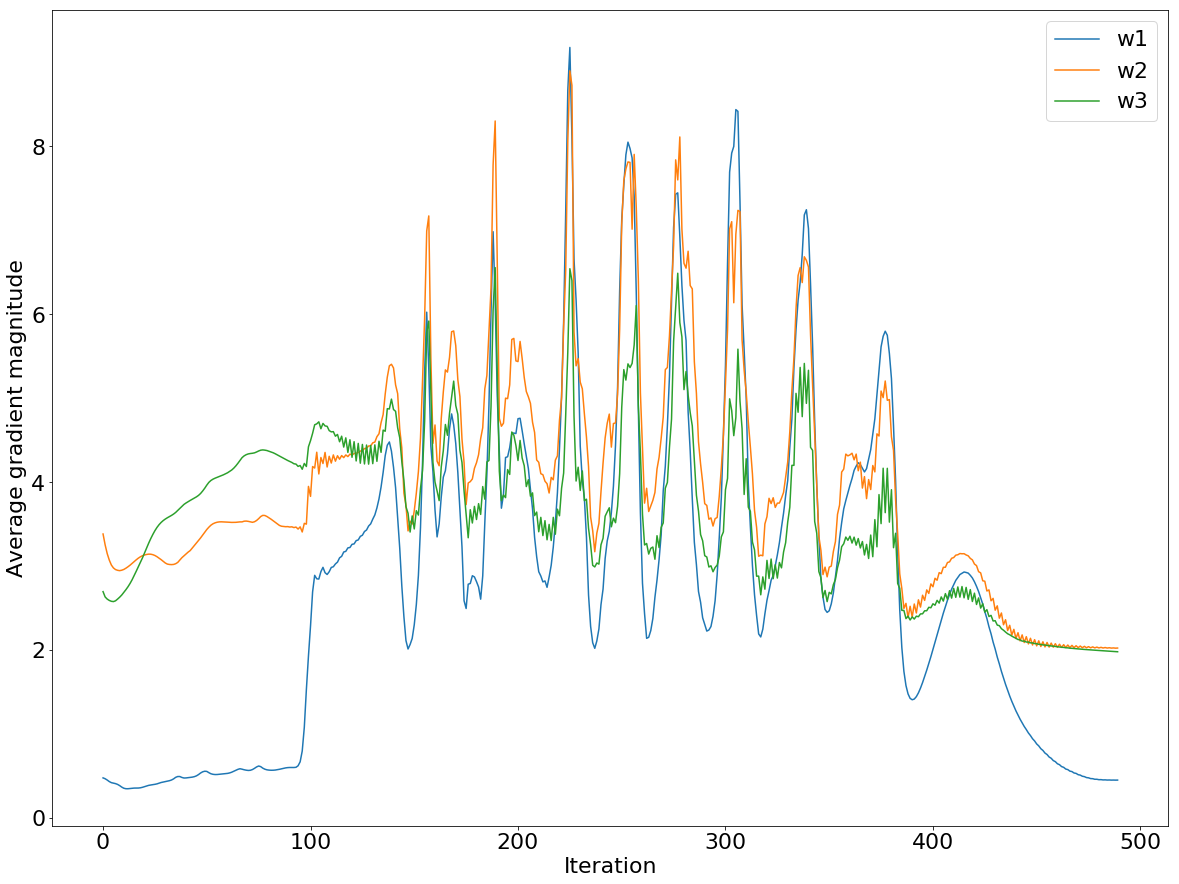

In [707]:
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

plt.figure(figsize = (20, 15))
plt.plot(abs(fmln.grad_w1_[10:]), label='w1')
plt.plot(abs(fmln.grad_w2_[10:]), label='w2')
plt.plot(abs(fmln.grad_w3_[10:]), label='w3')
plt.legend()
plt.ylabel('Average gradient magnitude')
plt.xlabel('Iteration')
plt.show()

<p>Looking at the above figure, we can see that the gradient magnitudes are following each other in jumps and sinks, despite the erratic behavior the gradients are showing.</p>

<h1>Implementation of RELU</h1>

<p>The below code shows an implementation of RELU and its performance on the previous image subset using the best model parameters that were obtained in the previous section.</p>

In [698]:
# Example adapted from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb
# Original Author: Sebastian Raschka

# This is the optional book we use in the course, excellent intuitions and straightforward programming examples
# please note, however, that this code has been manipulated to reflect our assumptions and notation.
import numpy as np
from scipy.special import expit
import sys
import pandas as pd

# start with a simple base classifier, which can't be fit or predicted
# it only has internal classes to be used by classes that will subclass it
class ThreeLayerPerceptronBaseReluSelu(object):
    def __init__(self, alpha, decreasing_const, phi, loss, n_hidden=30, C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.phi = phi
        self.loss = loss
        self.alpha = alpha
        self.decreasing_const = decreasing_const
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_ + 1)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_ + 1) # reshape to be W
        
        W2_num_elems = (self.n_hidden + 1)*self.n_hidden
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden, self.n_hidden + 1 )
        
        W3_num_elems = (self.n_hidden + 1)*self.n_output_
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_output_, self.n_hidden + 1)
        
        return W1, W2, W3
    
    @staticmethod
    def _activation(z, phi):
        
        if (phi == 'sigmoid'):
            return expit(z)
        elif (phi == 'linear'):
            return z
        elif (phi == 'relu'):
            return np.maximum(0,z.copy())
        else:
            return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1,W2,W3):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2))
    
    def _cost(self,A4,Y_enc,W1,W2,W3, loss):
        '''Get the objective function value'''
        
        if (loss == 'quad'):
            cost = np.mean((Y_enc-A4)**2)
        elif (loss == 'cross'):
            cost = -np.mean(np.nan_to_num((Y_enc*np.log(A4)+(1-Y_enc)*np.log(1-A4))))
        L2_term = self._L2_reg(self.l2_C, W1,W2,W3)
        
        return cost + L2_term

In [699]:
class ThreeLayerPerceptronReluSelu(ThreeLayerPerceptronBaseReluSelu):
    def _feedforward(self, X, W1, W2, W3, phi):

        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = self._add_bias_unit(X.T, how='row')
        Z1 = W1 @ A1
        A2 = self._activation(Z1, phi)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._activation(Z2, phi)
        A3 = self._add_bias_unit(A3, how='row')
        Z3 = W3 @ A3
        A4 = self._activation(Z3, phi)
        
        return A1, Z1, A2, Z2, A3, Z3, A4
    
    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3, phi, loss):
        """ Compute gradient step using backpropagation.
        """
        if (phi == 'sigmoid' and loss == 'quad'):
            
            V3 = -2*(Y_enc-A4)*A4*(1-A4)
            V2 = A3*(1-A3)*(W3.T @ V3)
            V1 = A2*(1-A2)*(W2.T @ V2[1:,:])
            
        elif (phi == 'sigmoid' and loss == 'cross'):
            
            V3 = -2*(Y_enc-A4)
            V2 = A3*(1-A3)*(W3.T @ V3)
            V1 = A2*(1-A2)*(W2.T @ V2[1:,:])
            
        elif (phi == 'linear' and loss == 'quad'):
            
            V3 = -2*(Y_enc - A4)
            V2 = (W3.T @ V3)
            V1 = (W2.T @ V2[1:,:])
            
        elif (phi == 'linear' and loss == 'cross'):
            
            V3 = -Y_enc/A4 +(Y_enc-1)/(1-A4)
            V2 = (W3.T @ V3)
            V1 = (W2.T @ V2[1:,:]) 
            
        elif (phi == 'relu' and loss == 'cross'):
            
            V3 = -Y_enc/A4 +(Y_enc-1)/(1-A4)
            Z1_with_bias = self._add_bias_unit(Z1,how='row')
            Z2_with_bias = self._add_bias_unit(Z2,how='row')
            V2 = (W3.T @ V3)
            V2[Z2_with_bias <= 0] = 0
            V1 = (W2.T @ V2[1:,:]) 
            V1[Z1_with_bias <= 0] = 0
            
            
        elif (phi == 'relu' and loss == 'quad'):
            
            V3 = -2*(Y_enc - A4)
            Z1_with_bias = self._add_bias_unit(Z1,how='row')
            Z2_with_bias = self._add_bias_unit(Z2,how='row')
            V2 = (W3.T @ V3)
            V2[Z2_with_bias <= 0] = 0
            V1 = (W2.T @ V2[1:,:]) 
            V1[Z1_with_bias <= 0] = 0

            
            
        grad3 = V3 @ A3.T
        grad2 = V2[1:,:] @ A2.T
        grad1 = V1[1:,:] @ A1.T

        
        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C
        grad3[:, 1:] += W3[:, 1:] * self.l2_C

        return grad1, grad2, grad3
    
    def predict(self, X):
        """Predict class labels"""
        A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X, self.W1, self.W2, self.W3, self.phi)
        y_pred = np.argmax(A4, axis=0)
        return y_pred
    
    
    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data."""
        
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3 = self._initialize_weights()
        
        delta_W1_prev = np.zeros(self.W1.shape)
        delta_W2_prev = np.zeros(self.W2.shape)
        delta_W3_prev = np.zeros(self.W3.shape)
        
        self.grad_w1_ = []
        self.grad_w2_ = []
        self.grad_w3_ = []


        self.cost_ = []
        for i in range(self.epochs):
            
            self.eta /= (1 + self.decreasing_const*i)

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            # feedforward all instances
            A1, Z1, A2, Z2, A3, Z3, A4 = self._feedforward(X_data,self.W1,self.W2,self.W3, self.phi)
            
            cost = self._cost(A4,Y_enc,self.W1,self.W2,self.W3, self.loss)
            self.cost_.append(cost)

            # compute gradient via backpropagation
            grad1, grad2, grad3 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, Z1=Z1, Z2=Z2, Z3=Z3, Y_enc=Y_enc,
                                              W1=self.W1, W2=self.W2, W3=self.W3, phi=self.phi,loss=self.loss)
            
            self.grad_w1_.append(np.mean(np.absolute(grad1)))
            self.grad_w2_.append(np.mean(np.absolute(grad2)))
            self.grad_w3_.append(np.mean(np.absolute(grad3)))
            
            delta_W1, delta_W2, delta_W3 = self.eta * grad1, self.eta * grad2, self.eta * grad3

            self.W1 -= (delta_W1 + self.alpha*delta_W1_prev)
            self.W2 -= (delta_W2 + self.alpha*delta_W2_prev)
            self.W3 -= (delta_W3 + self.alpha*delta_W3_prev)
        
        self.grad_w1_ = np.array(self.grad_w1_)
        self.grad_w2_ = np.array(self.grad_w2_)
        self.grad_w3_ = np.array(self.grad_w3_)

        return self

In [715]:
fmln = ThreeLayerPerceptronReluSelu(alpha=0.001, decreasing_const=1e-5,phi='relu', loss='cross', n_hidden=10, C=0.001, epochs=500, eta=0.001, random_state=None)
fmln.fit(X_train, y_train)
yhat = fmln.predict(X_test)
print('The accuracy of the model is:',accuracy_score(y_test, yhat)*100,'%')

C:\Users\abdallah.jabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning:

divide by zero encountered in log

C:\Users\abdallah.jabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning:

invalid value encountered in multiply

C:\Users\abdallah.jabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning:

invalid value encountered in log

C:\Users\abdallah.jabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\abdallah.jabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\abdallah.jabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning:

invalid value encountered in maximum

C:\Users\abdallah.jabr\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning:

invalid value encountered in less_equal

C:\Users\abdallah.jabr\Anaconda3\lib\site-packages\ipykernel_launcher.

The accuracy of the model is: 12.0 %


<p>The RELU activation function yielded a test accuracy of 10% as shown above.</p>